In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv("housing.csv")

# Display the first few rows of the dataframe
print("First few rows of the dataframe:")
print(df.head())

First few rows of the dataframe:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [9]:
# Preprocessing
# Fill missing values in 'total_bedrooms' column with median
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

In [11]:
# Handle categorical variables
# Encode 'ocean_proximity' using one-hot encoding
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into features (X) and target variable (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

Mean Squared Error: 4908476721.15661
Root Mean Squared Error: 70060.52184473514
R-squared Score: 0.625424062055361


In [13]:
# Calculate Z-scores for each numerical feature
z_scores = (df - df.mean()) / df.std()

# Identify outliers based on a threshold (e.g., |Z-score| > 3)
outlier_indices = (z_scores > 3).any(axis=1)

# Remove outliers from the dataframe
df_clean = df[~outlier_indices]

# Check the shape of the cleaned dataframe
print("Shape of cleaned dataframe:", df_clean.shape)

Shape of cleaned dataframe: (19741, 13)


In [14]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the numerical features
df_clean_scaled = df_clean.copy()  # Create a copy of the cleaned dataframe
numerical_cols = df_clean_scaled.select_dtypes(include=['float64']).columns
df_clean_scaled[numerical_cols] = scaler.fit_transform(df_clean_scaled[numerical_cols])

# Display the first few rows of the scaled dataframe
print("First few rows of the scaled dataframe:")
print(df_clean_scaled.head())

First few rows of the scaled dataframe:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.211155  0.567481            0.784314     0.095674        0.071388   
1   0.212151  0.565356            0.392157     0.773346        0.620573   
2   0.210159  0.564293            1.000000     0.159638        0.105677   
3   0.209163  0.564293            1.000000     0.138607        0.130972   
4   0.209163  0.564293            1.000000     0.177073        0.156268   

   population  households  median_income  median_house_value  \
0    0.066251    0.075518       0.864082            0.902266   
1    0.498027    0.691839       0.861454            0.708247   
2    0.102388    0.106577       0.746174            0.695051   
3    0.115265    0.132156       0.567920            0.672783   
4    0.116719    0.156516       0.369504            0.674638   

   ocean_proximity_INLAND  ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                   False                   F

/Users/refilwemaleka/anaconda3/lib/python3.11/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


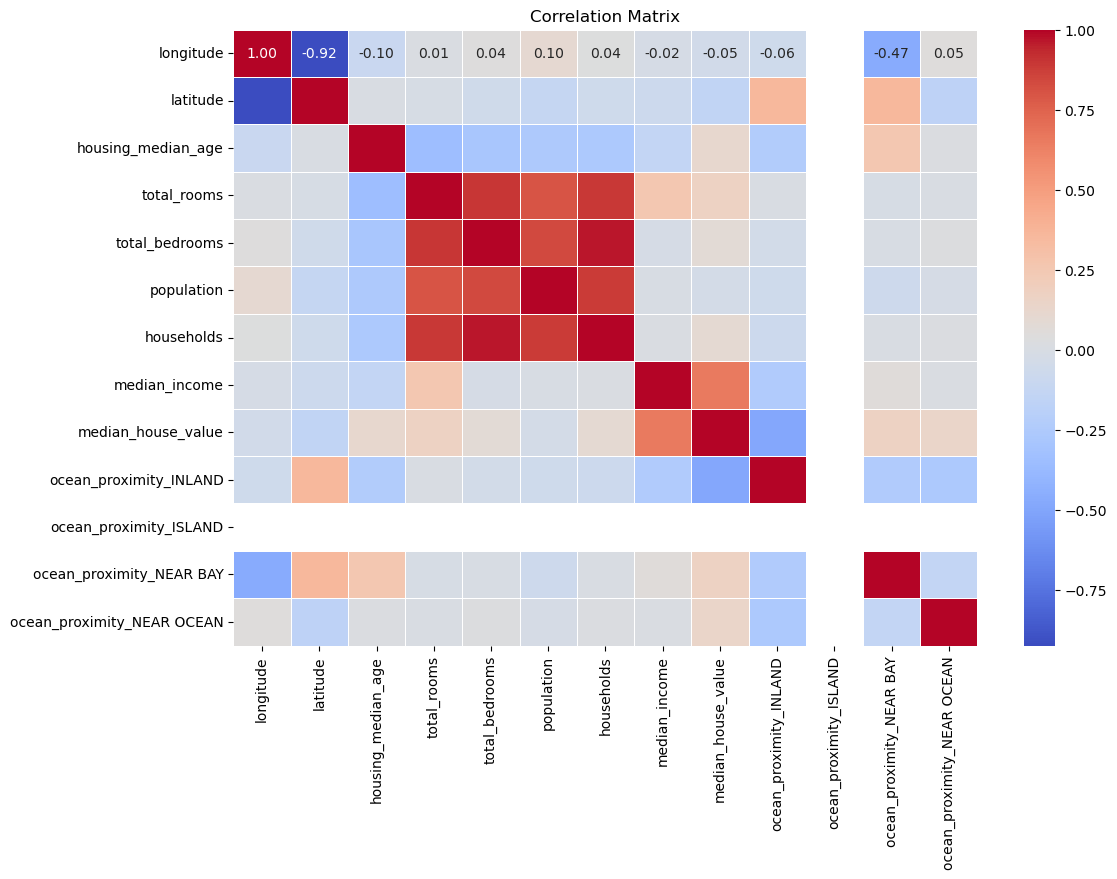

In [15]:
# Calculate the correlation matrix
corr_matrix = df_clean_scaled.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

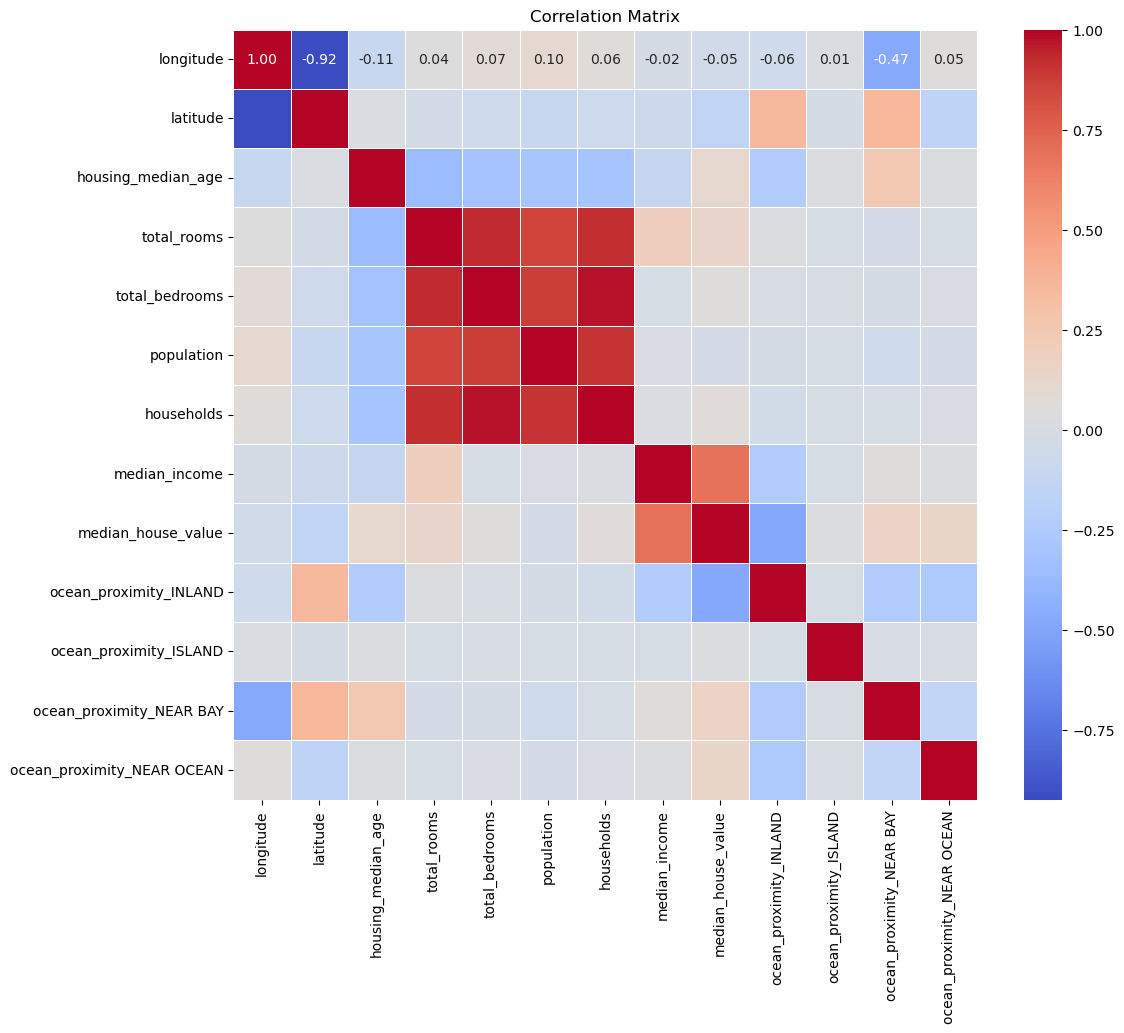

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

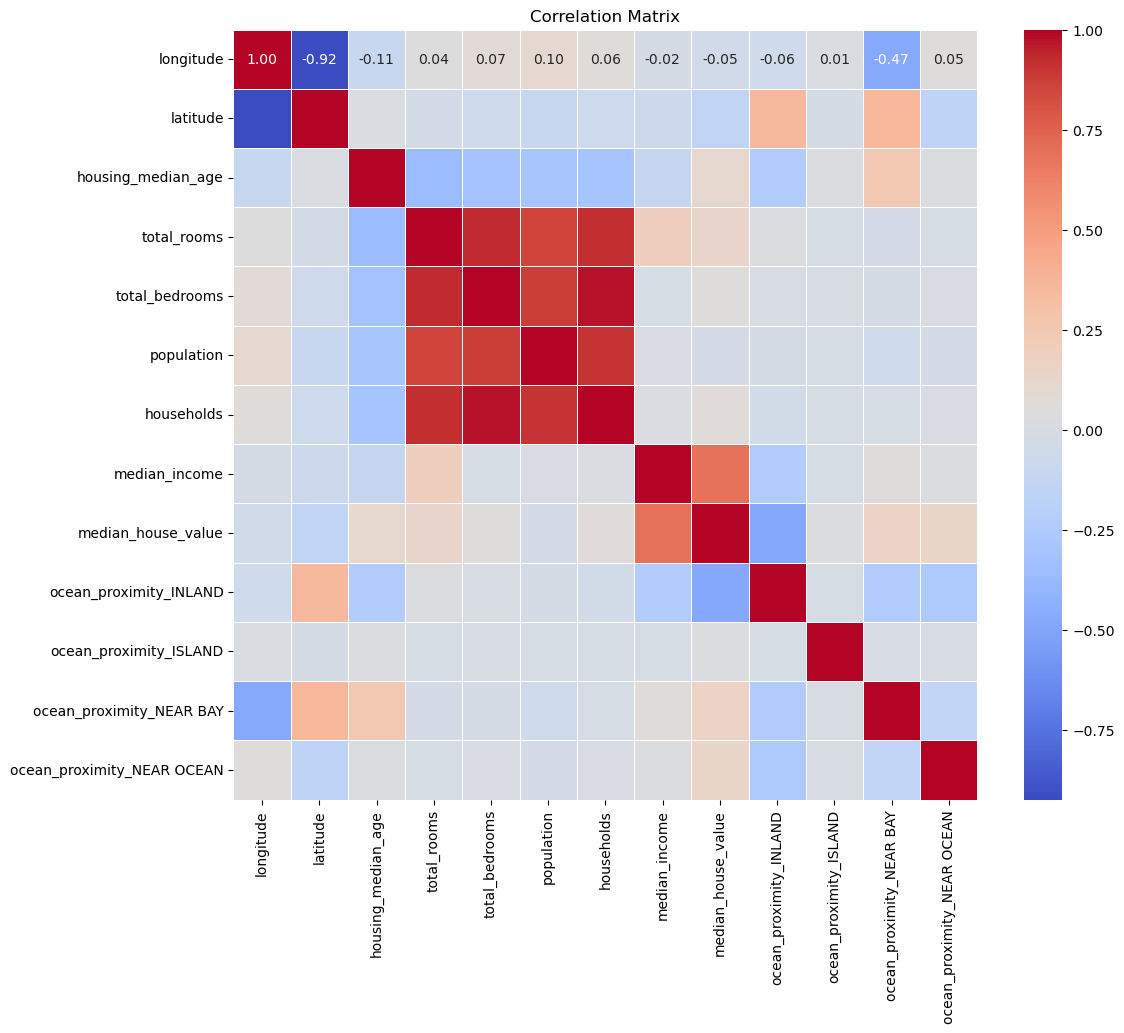

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()